In [1]:
# preliminaries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from tensorflow import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Add
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,30)

In [2]:
# paths to dataframe csv files
DF_FULL_PATH = 'Data/df_full.csv'

In [3]:
# load dataframes for each position
df_full = pd.read_csv(DF_FULL_PATH, index_col=0)
cb_df = df_full[df_full.position=='CB']
fb_df = df_full[df_full.position=='FB']
dm_df = df_full[df_full.position=='DM']
m_df = df_full[df_full.position=='M']
w_df = df_full[df_full.position=='W']
cf_df = df_full[df_full.position=='CF']

In [4]:
RAW_TRAITS = ['goals', 'shots', 'conversion', 'positioning', 'assists', 'crossing', 'dribbling', 'carries',
              'involvement', 'accuracy', 'intent', 'receiving', 'aerial', 'on_ball', 'off_ball', 'fouls']
SEED = 0
DEV_PROPORTION = 0.15

In [5]:
# get raw traits per position as numpy array
cb_raw_traits = cb_df[RAW_TRAITS].to_numpy()
fb_raw_traits = fb_df[RAW_TRAITS].to_numpy()
dm_raw_traits = dm_df[RAW_TRAITS].to_numpy()
m_raw_traits = m_df[RAW_TRAITS].to_numpy()
w_raw_traits = w_df[RAW_TRAITS].to_numpy()
cf_raw_traits = cf_df[RAW_TRAITS].to_numpy()

### Framework 1
-	Input: traits for one player
-	Output: similarity scores for all players

In [37]:
# get features as raw traits for each position
cb_features_1 = cb_raw_traits
fb_features_1 = fb_raw_traits
dm_features_1 = dm_raw_traits
m_features_1 = m_raw_traits
w_features_1 = w_raw_traits
cf_features_1 = cf_raw_traits

In [38]:
# get labels for each position as cosine similarity score
cb_labels_1 = cosine_similarity(cb_raw_traits)
fb_labels_1 = cosine_similarity(fb_raw_traits)
dm_labels_1 = cosine_similarity(dm_raw_traits)
m_labels_1 = cosine_similarity(m_raw_traits)
w_labels_1 = cosine_similarity(w_raw_traits)
cf_labels_1 = cosine_similarity(cf_raw_traits)

In [39]:
# split features and labels into training and development datasets
cb_X_train_1, cb_X_dev_1, cb_Y_train_1, cb_Y_dev_1 = train_test_split(cb_features_1,
                                                                      cb_labels_1,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)
fb_X_train_1, fb_X_dev_1, fb_Y_train_1, fb_Y_dev_1 = train_test_split(fb_features_1,
                                                                      fb_labels_1,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)
dm_X_train_1, dm_X_dev_1, dm_Y_train_1, dm_Y_dev_1 = train_test_split(dm_features_1,
                                                                      dm_labels_1,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)
m_X_train_1, m_X_dev_1, m_Y_train_1, m_Y_dev_1 = train_test_split(m_features_1,
                                                                  m_labels_1,
                                                                  test_size=DEV_PROPORTION,
                                                                  random_state=SEED)
w_X_train_1, w_X_dev_1, w_Y_train_1, w_Y_dev_1 = train_test_split(w_features_1,
                                                                  w_labels_1,
                                                                  test_size=DEV_PROPORTION,
                                                                  random_state=SEED)
cf_X_train_1, cf_X_dev_1, cf_Y_train_1, cf_Y_dev_1 = train_test_split(cf_features_1,
                                                                      cf_labels_1,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)

### Framework 2
-	Input: traits for two player
-	Output: similarity score

In [6]:
# get features as the concatenation of raw traits for each pair of players for each position
cb_features_2 = np.array([np.concatenate((cb_raw_traits[player_1_index], cb_raw_traits[player_2_index])) for player_1_index in range(cb_raw_traits.shape[0]) for player_2_index in range(cb_raw_traits.shape[0])])
fb_features_2 = np.array([np.concatenate((fb_raw_traits[player_1_index], fb_raw_traits[player_2_index])) for player_1_index in range(fb_raw_traits.shape[0]) for player_2_index in range(fb_raw_traits.shape[0])])
dm_features_2 = np.array([np.concatenate((dm_raw_traits[player_1_index], dm_raw_traits[player_2_index])) for player_1_index in range(dm_raw_traits.shape[0]) for player_2_index in range(dm_raw_traits.shape[0])])
m_features_2 = np.array([np.concatenate((m_raw_traits[player_1_index], m_raw_traits[player_2_index])) for player_1_index in range(m_raw_traits.shape[0]) for player_2_index in range(m_raw_traits.shape[0])])
w_features_2 = np.array([np.concatenate((w_raw_traits[player_1_index], w_raw_traits[player_2_index])) for player_1_index in range(w_raw_traits.shape[0]) for player_2_index in range(w_raw_traits.shape[0])])
cf_features_2 = np.array([np.concatenate((cf_raw_traits[player_1_index], cf_raw_traits[player_2_index])) for player_1_index in range(cf_raw_traits.shape[0]) for player_2_index in range(cf_raw_traits.shape[0])])

In [7]:
# get labels for each position as cosine similarity score flattened array
cb_labels_2 = cosine_similarity(cb_raw_traits).flatten()
fb_labels_2 = cosine_similarity(fb_raw_traits).flatten()
dm_labels_2 = cosine_similarity(dm_raw_traits).flatten()
m_labels_2 = cosine_similarity(m_raw_traits).flatten()
w_labels_2 = cosine_similarity(w_raw_traits).flatten()
cf_labels_2 = cosine_similarity(cf_raw_traits).flatten()

In [8]:
# split features and labels into training and development datasets
cb_X_train_2, cb_X_dev_2, cb_Y_train_2, cb_Y_dev_2 = train_test_split(cb_features_2,
                                                                      cb_labels_2,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)
fb_X_train_2, fb_X_dev_2, fb_Y_train_2, fb_Y_dev_2 = train_test_split(fb_features_2,
                                                                      fb_labels_2,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)
dm_X_train_2, dm_X_dev_2, dm_Y_train_2, dm_Y_dev_2 = train_test_split(dm_features_2,
                                                                      dm_labels_2,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)
m_X_train_2, m_X_dev_2, m_Y_train_2, m_Y_dev_2 = train_test_split(m_features_2,
                                                                  m_labels_2,
                                                                  test_size=DEV_PROPORTION,
                                                                  random_state=SEED)
w_X_train_2, w_X_dev_2, w_Y_train_2, w_Y_dev_2 = train_test_split(w_features_2,
                                                                  w_labels_2,
                                                                  test_size=DEV_PROPORTION,
                                                                  random_state=SEED)
cf_X_train_2, cf_X_dev_2, cf_Y_train_2, cf_Y_dev_2 = train_test_split(cf_features_2,
                                                                      cf_labels_2,
                                                                      test_size=DEV_PROPORTION,
                                                                      random_state=SEED)

In [9]:
def compile_model(model, loss, optimizer, metrics):
    
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics
                  )
    
    return model

def train_model(model, X_train, Y_train, X_dev, Y_dev, epochs, batch_size):
    
    history = model.fit(X_train,
                        Y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_dev, Y_dev),
                        verbose=0)
    return history

def display_learning_curves(history_dict):
    count = 0
    for pos, history in history_dict.items():
        plt.subplot(len(history_dict), 2, count+1)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'{pos} MAE plot')
        plt.ylabel('MAE')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')

        plt.subplot(len(history_dict), 2, count+2)
        plt.plot(history.history['mse'])
        plt.plot(history.history['val_mse'])
        plt.title(f'{pos} MSE plot')
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        
        count += 2
        
    plt.tight_layout()
    plt.show()

### Neural Network 1
- Fully connected model

In [31]:
def create_fully_connected(output_shape, input_shape):
    
    # baseline architecture
    fully_connected = Sequential(
        [
            Dense(50, activation='relu', input_dim=input_shape),
            Dense(100, activation='relu'),
            Dense(200, activation='relu'),
            Dropout(0.2),
            Dense(100, activation='relu'),
            Dropout(0.2),
            Dense(50, activation='relu'),
            Dense(output_shape, activation='sigmoid')
        ]
    )

#     print(fully_connected.summary())

    return fully_connected

### Neural Network 2
- Skip connections model

In [10]:
def create_block(hidden_units):

    # create block of hidden layers
    block_layers = []
    for units in hidden_units:
        block_layers.append(Dropout(0.2))
        block_layers.append(Dense(units, activation='relu'))

    block = Sequential(block_layers)
    
    return block

def create_skip_connections(output_shape, input_shape):

    # skip connection model architecture
    inputs = Input(input_shape)
    block_0 = create_block([100, 100])(inputs)
    for i in range(5):
        block_1 = create_block([100, 100])(block_0)
        block_0 = Add()([block_0, block_1])
    outputs = Dense(output_shape, activation='sigmoid')(block_0)

    skip_connection_model = Model(inputs=inputs, outputs=outputs)

#     print(skip_connection_model.summary())

    return skip_connection_model

### Training

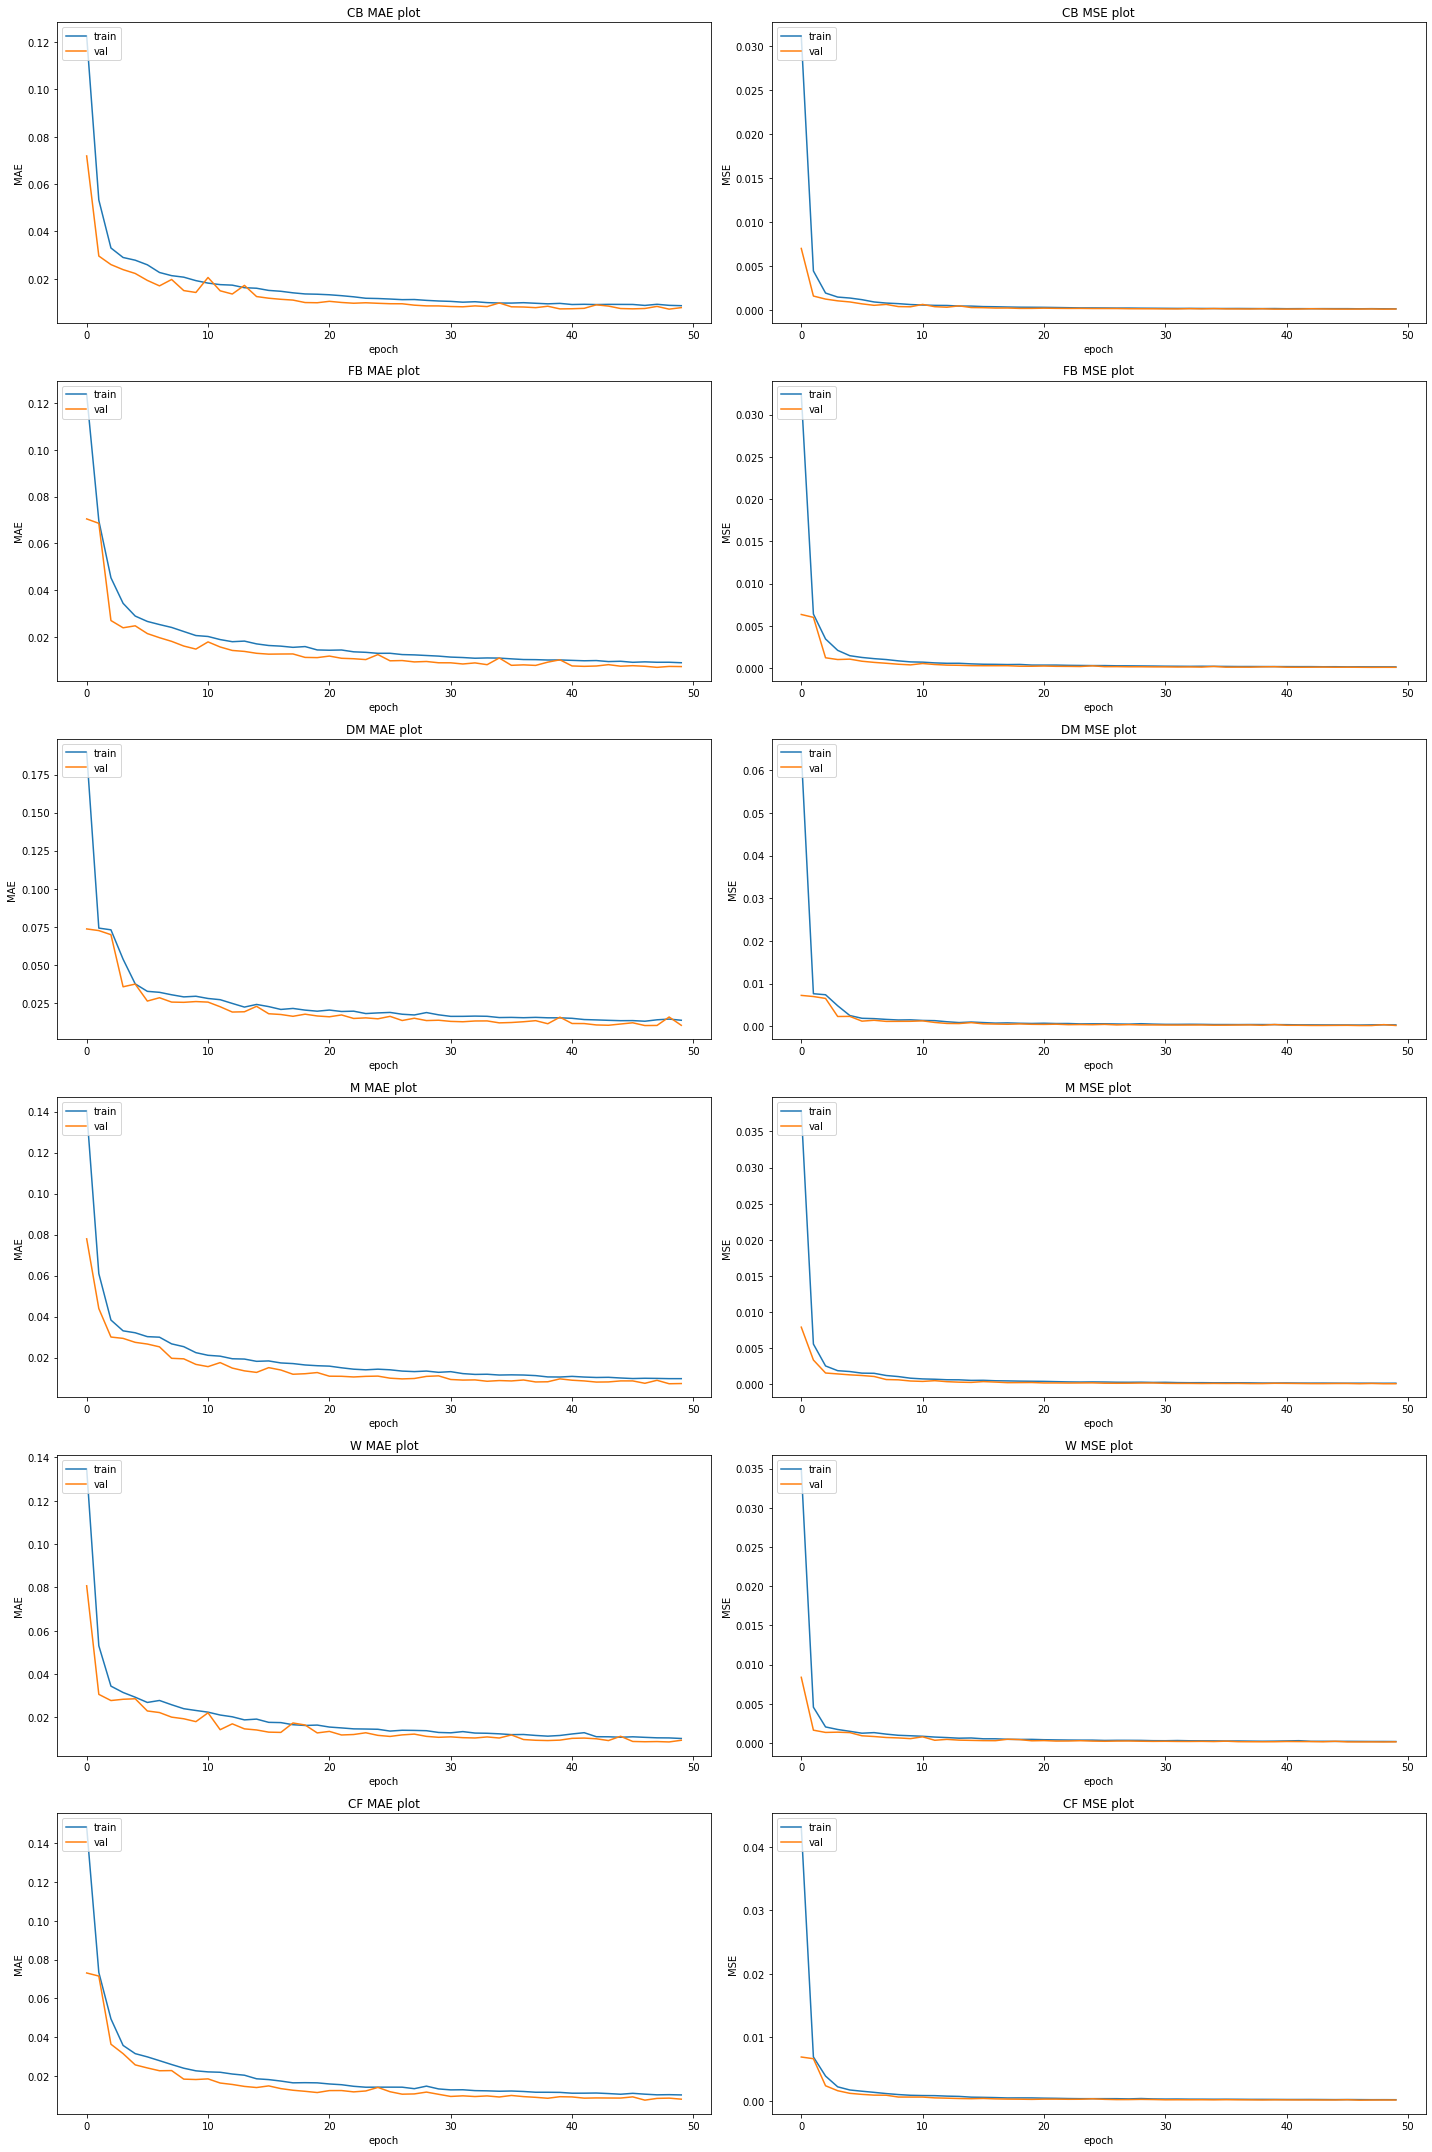

In [57]:
### Framework 1 Neural Network 1

# create models
cb_fully_connected_1 = create_fully_connected(cb_raw_traits.shape[0], cb_raw_traits.shape[1])
fb_fully_connected_1 = create_fully_connected(fb_raw_traits.shape[0], fb_raw_traits.shape[1])
dm_fully_connected_1 = create_fully_connected(dm_raw_traits.shape[0], dm_raw_traits.shape[1])
m_fully_connected_1 = create_fully_connected(m_raw_traits.shape[0], m_raw_traits.shape[1])
w_fully_connected_1 = create_fully_connected(w_raw_traits.shape[0], w_raw_traits.shape[1])
cf_fully_connected_1 = create_fully_connected(cf_raw_traits.shape[0], cf_raw_traits.shape[1])

# compile models
cb_fully_connected_1 = compile_model(cb_fully_connected_1, loss='mae', optimizer='adam', metrics='mse')
fb_fully_connected_1 = compile_model(fb_fully_connected_1, loss='mae', optimizer='adam', metrics='mse')
dm_fully_connected_1 = compile_model(dm_fully_connected_1, loss='mae', optimizer='adam', metrics='mse')
m_fully_connected_1 = compile_model(m_fully_connected_1, loss='mae', optimizer='adam', metrics='mse')
w_fully_connected_1 = compile_model(w_fully_connected_1, loss='mae', optimizer='adam', metrics='mse')
cf_fully_connected_1 = compile_model(cf_fully_connected_1, loss='mae', optimizer='adam', metrics='mse')

# train models
cb_fully_connected_1_history = train_model(cb_fully_connected_1,
                                           cb_X_train_1, 
                                           cb_Y_train_1, 
                                           cb_X_dev_1, 
                                           cb_Y_dev_1, 
                                           epochs=50, 
                                           batch_size=16)
fb_fully_connected_1_history = train_model(fb_fully_connected_1,
                                           fb_X_train_1, 
                                           fb_Y_train_1, 
                                           fb_X_dev_1, 
                                           fb_Y_dev_1, 
                                           epochs=50, 
                                           batch_size=16)
dm_fully_connected_1_history = train_model(dm_fully_connected_1,
                                           dm_X_train_1, 
                                           dm_Y_train_1, 
                                           dm_X_dev_1, 
                                           dm_Y_dev_1, 
                                           epochs=50, 
                                           batch_size=16)
m_fully_connected_1_history = train_model(m_fully_connected_1,
                                          m_X_train_1, 
                                          m_Y_train_1, 
                                          m_X_dev_1, 
                                          m_Y_dev_1, 
                                          epochs=50, 
                                          batch_size=16)
w_fully_connected_1_history = train_model(w_fully_connected_1,
                                          w_X_train_1, 
                                          w_Y_train_1, 
                                          w_X_dev_1, 
                                          w_Y_dev_1, 
                                          epochs=50, 
                                          batch_size=16)
cf_fully_connected_1_history = train_model(cf_fully_connected_1,
                                           cf_X_train_1, 
                                           cf_Y_train_1, 
                                           cf_X_dev_1, 
                                           cf_Y_dev_1, 
                                           epochs=50, 
                                           batch_size=16)

# display results
fully_connected_1_history_dict = {'CB': cb_fully_connected_1_history,
                                  'FB': fb_fully_connected_1_history,
                                  'DM': dm_fully_connected_1_history,
                                  'M': m_fully_connected_1_history,
                                  'W': w_fully_connected_1_history,
                                  'CF': cf_fully_connected_1_history
                                 }

display_learning_curves(fully_connected_1_history_dict)

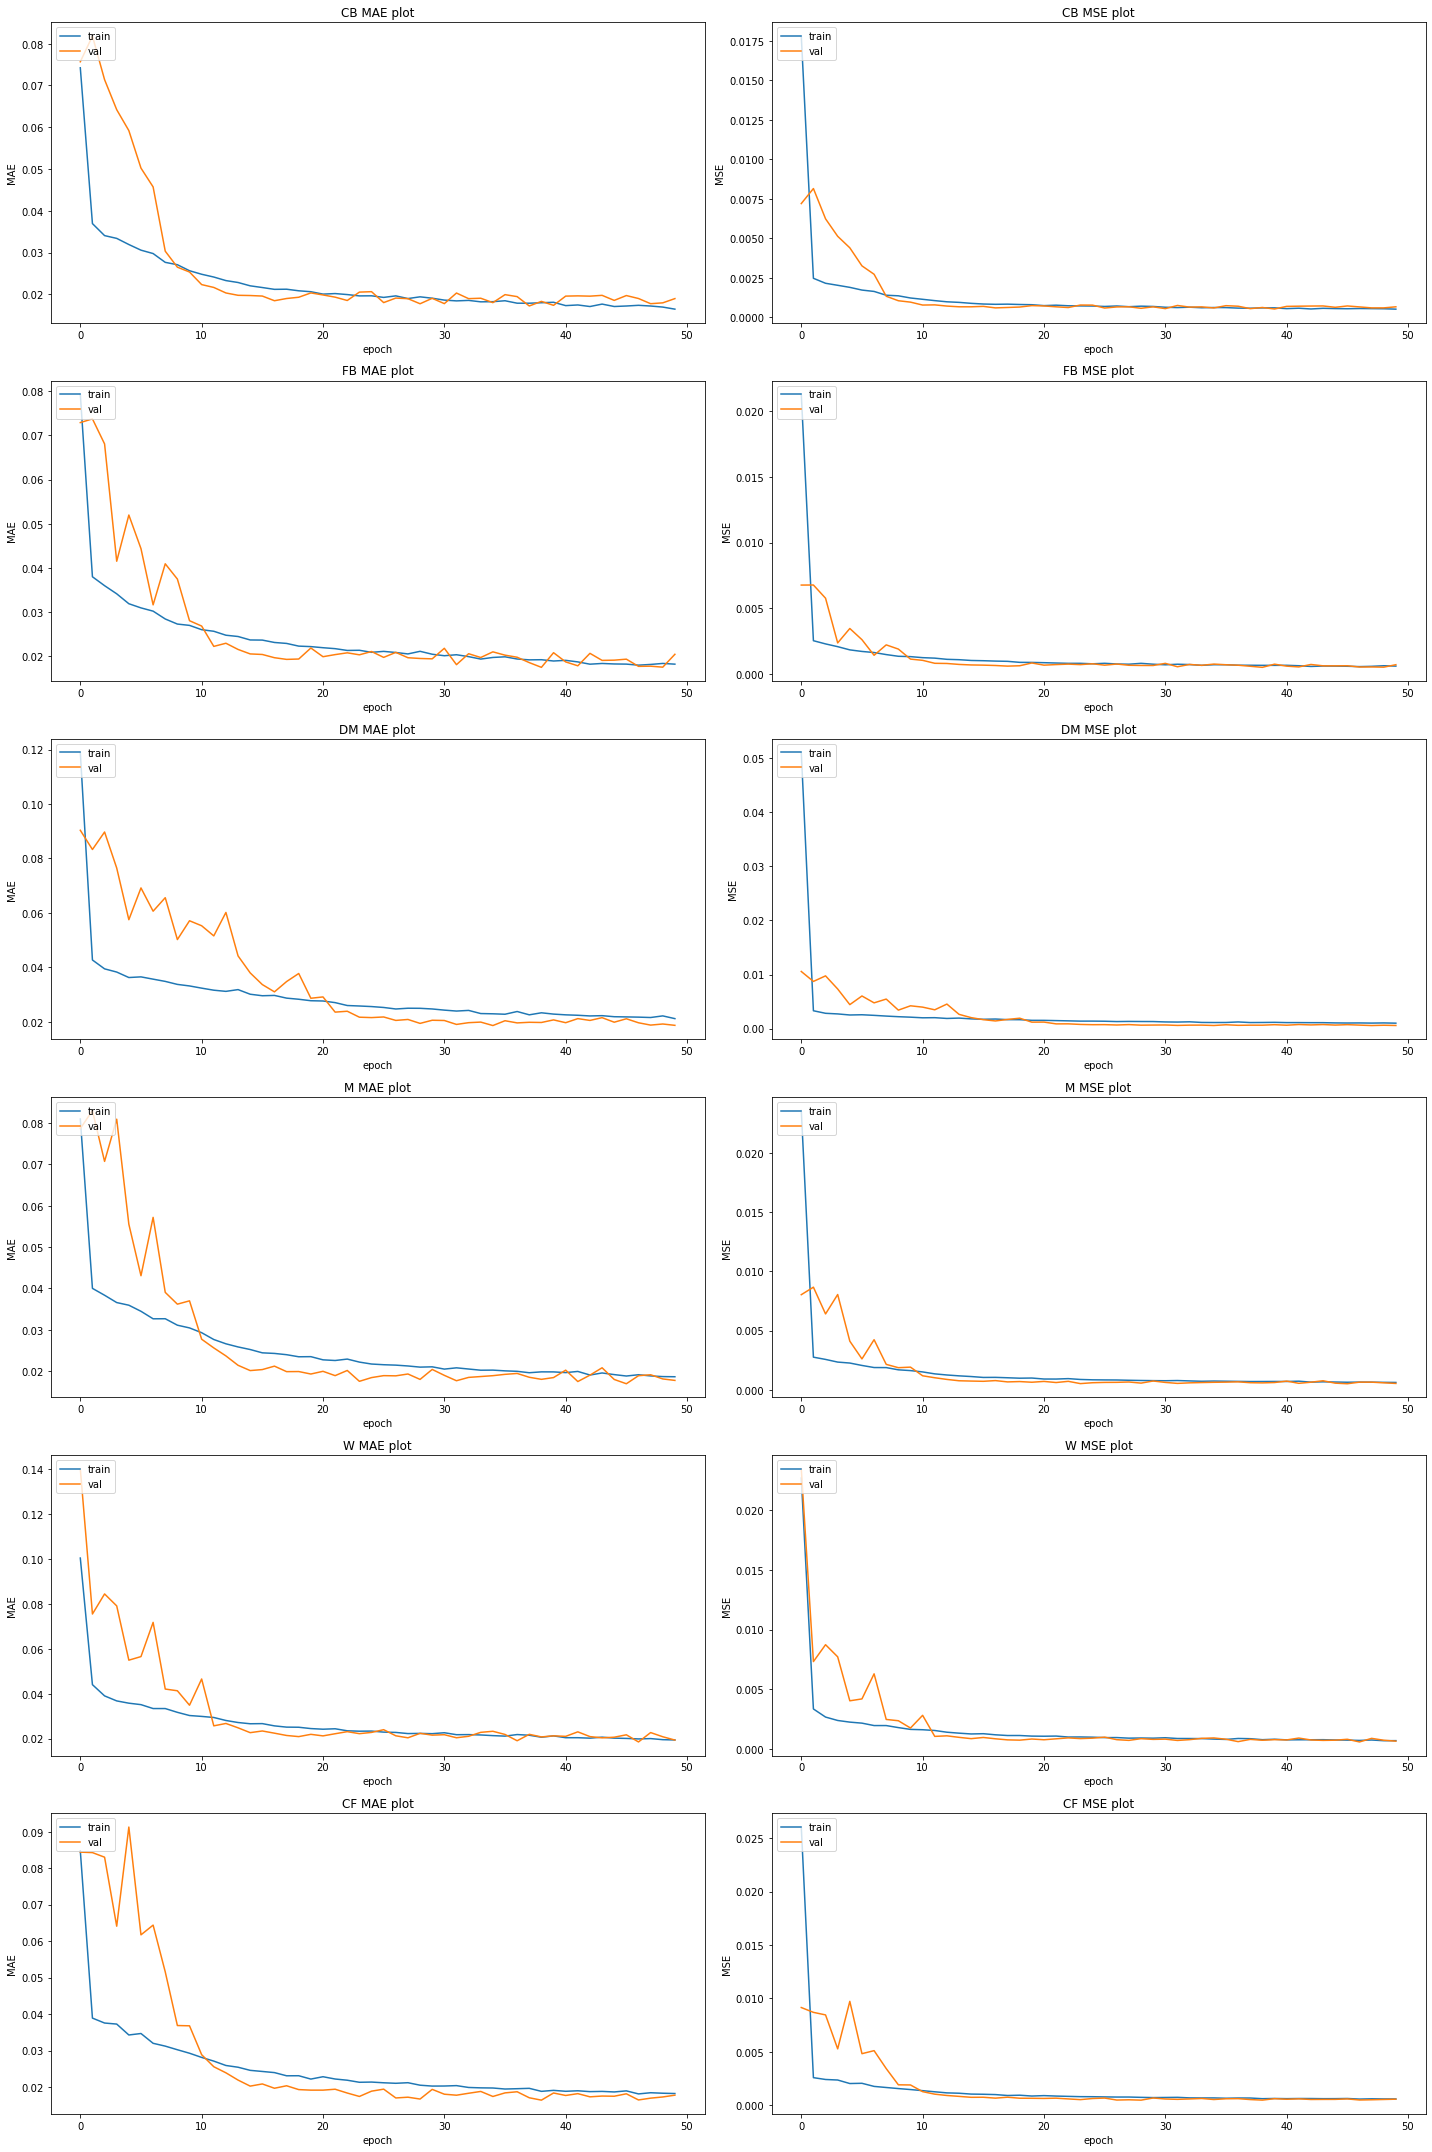

In [60]:
### Framework 1 Neural Network 2

# create models
cb_skip_connections_1 = create_skip_connections(cb_raw_traits.shape[0], cb_raw_traits.shape[1])
fb_skip_connections_1 = create_skip_connections(fb_raw_traits.shape[0], fb_raw_traits.shape[1])
dm_skip_connections_1 = create_skip_connections(dm_raw_traits.shape[0], dm_raw_traits.shape[1])
m_skip_connections_1 = create_skip_connections(m_raw_traits.shape[0], m_raw_traits.shape[1])
w_skip_connections_1 = create_skip_connections(w_raw_traits.shape[0], w_raw_traits.shape[1])
cf_skip_connections_1 = create_skip_connections(cf_raw_traits.shape[0], cf_raw_traits.shape[1])

# compile models
cb_skip_connections_1 = compile_model(cb_skip_connections_1, loss='mae', optimizer='adam', metrics='mse')
fb_skip_connections_1 = compile_model(fb_skip_connections_1, loss='mae', optimizer='adam', metrics='mse')
dm_skip_connections_1 = compile_model(dm_skip_connections_1, loss='mae', optimizer='adam', metrics='mse')
m_skip_connections_1 = compile_model(m_skip_connections_1, loss='mae', optimizer='adam', metrics='mse')
w_skip_connections_1 = compile_model(w_skip_connections_1, loss='mae', optimizer='adam', metrics='mse')
cf_skip_connections_1 = compile_model(cf_skip_connections_1, loss='mae', optimizer='adam', metrics='mse')

# train models
cb_skip_connections_1_history = train_model(cb_skip_connections_1,
                                            cb_X_train_1, 
                                            cb_Y_train_1, 
                                            cb_X_dev_1, 
                                            cb_Y_dev_1, 
                                            epochs=50, 
                                            batch_size=16)
fb_skip_connections_1_history = train_model(fb_skip_connections_1,
                                            fb_X_train_1, 
                                            fb_Y_train_1, 
                                            fb_X_dev_1, 
                                            fb_Y_dev_1, 
                                            epochs=50, 
                                            batch_size=16)
dm_skip_connections_1_history = train_model(dm_skip_connections_1,
                                            dm_X_train_1, 
                                            dm_Y_train_1, 
                                            dm_X_dev_1, 
                                            dm_Y_dev_1,
                                            epochs=50, 
                                            batch_size=16)
m_skip_connections_1_history = train_model(m_skip_connections_1,
                                           m_X_train_1, 
                                           m_Y_train_1, 
                                           m_X_dev_1, 
                                           m_Y_dev_1, 
                                           epochs=50, 
                                           batch_size=16)
w_skip_connections_1_history = train_model(w_skip_connections_1,
                                           w_X_train_1, 
                                           w_Y_train_1, 
                                           w_X_dev_1, 
                                           w_Y_dev_1,
                                           epochs=50,
                                           batch_size=16)
cf_skip_connections_1_history = train_model(cf_skip_connections_1,
                                            cf_X_train_1,
                                            cf_Y_train_1, 
                                            cf_X_dev_1, 
                                            cf_Y_dev_1, 
                                            epochs=50, 
                                            batch_size=16)

# display results
skip_connections_1_history_dict = {'CB': cb_skip_connections_1_history,
                                   'FB': fb_skip_connections_1_history,
                                   'DM': dm_skip_connections_1_history,
                                   'M': m_skip_connections_1_history,
                                   'W': w_skip_connections_1_history,
                                   'CF': cf_skip_connections_1_history
                                  }

display_learning_curves(skip_connections_1_history_dict)

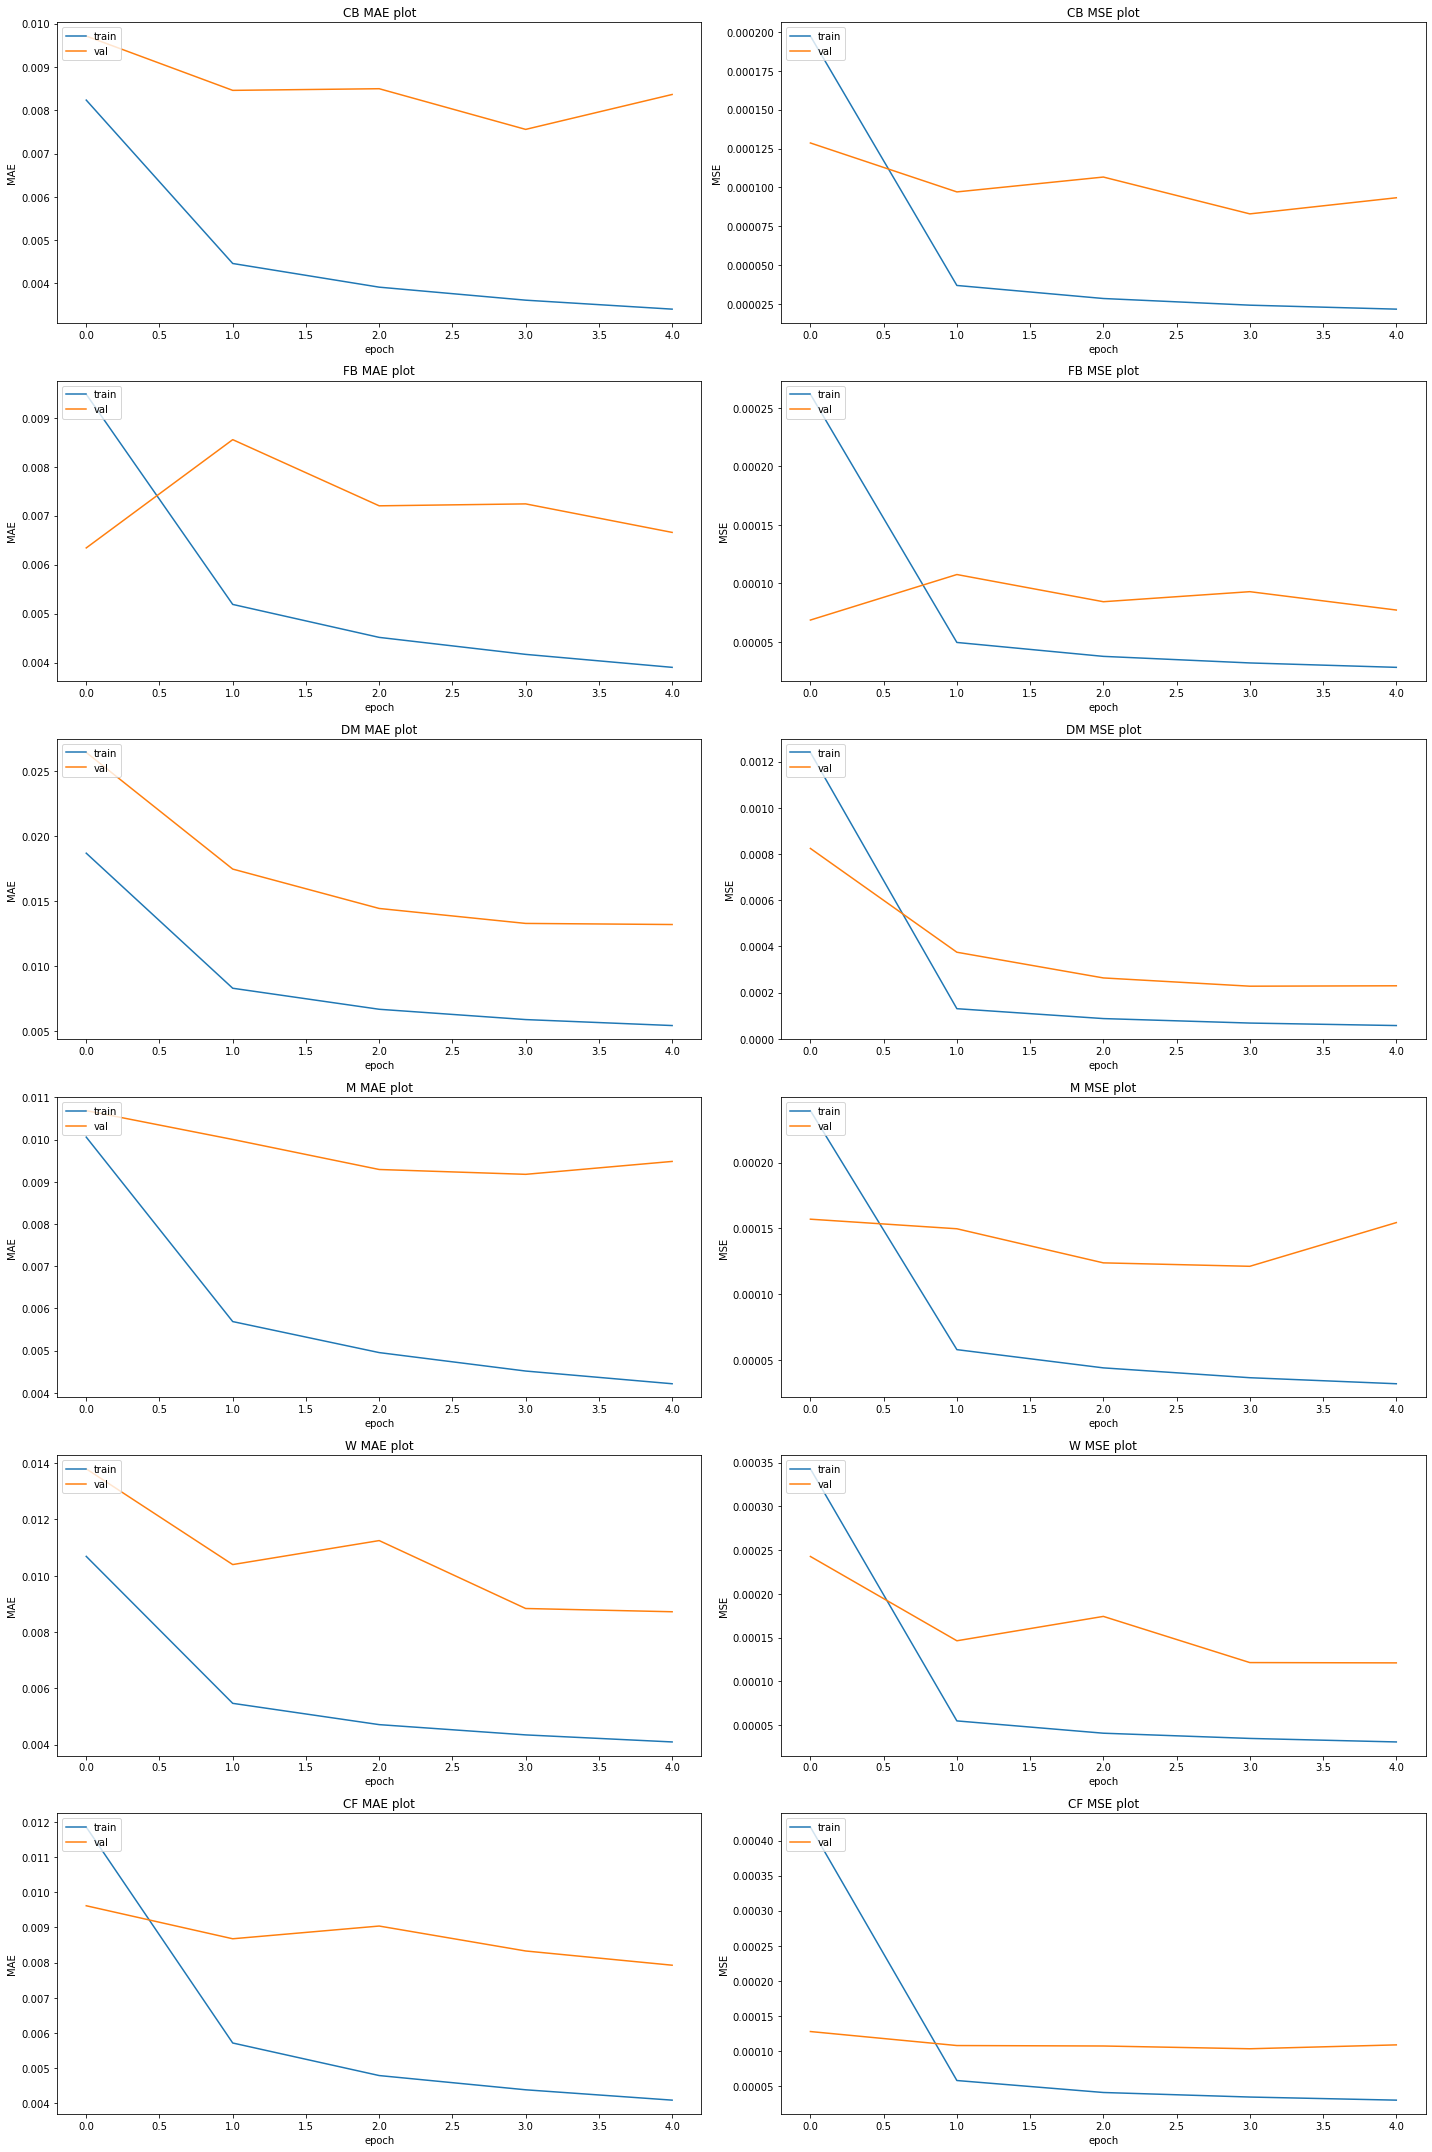

In [61]:
### Framework 2 Neural Network 1

# create models
cb_fully_connected_2 = create_fully_connected(1, cb_raw_traits.shape[1]*2)
fb_fully_connected_2 = create_fully_connected(1, fb_raw_traits.shape[1]*2)
dm_fully_connected_2 = create_fully_connected(1, dm_raw_traits.shape[1]*2)
m_fully_connected_2 = create_fully_connected(1, m_raw_traits.shape[1]*2)
w_fully_connected_2 = create_fully_connected(1, w_raw_traits.shape[1]*2)
cf_fully_connected_2 = create_fully_connected(1, cf_raw_traits.shape[1]*2)

# compile models
cb_fully_connected_2 = compile_model(cb_fully_connected_2, loss='mae', optimizer='adam', metrics='mse')
fb_fully_connected_2 = compile_model(fb_fully_connected_2, loss='mae', optimizer='adam', metrics='mse')
dm_fully_connected_2 = compile_model(dm_fully_connected_2, loss='mae', optimizer='adam', metrics='mse')
m_fully_connected_2 = compile_model(m_fully_connected_2, loss='mae', optimizer='adam', metrics='mse')
w_fully_connected_2 = compile_model(w_fully_connected_2, loss='mae', optimizer='adam', metrics='mse')
cf_fully_connected_2 = compile_model(cf_fully_connected_2, loss='mae', optimizer='adam', metrics='mse')

# train models
cb_fully_connected_2_history = train_model(cb_fully_connected_2,
                                           cb_X_train_2, 
                                           cb_Y_train_2, 
                                           cb_X_dev_2, 
                                           cb_Y_dev_2, 
                                           epochs=5, 
                                           batch_size=256)
fb_fully_connected_2_history = train_model(fb_fully_connected_2,
                                           fb_X_train_2, 
                                           fb_Y_train_2, 
                                           fb_X_dev_2, 
                                           fb_Y_dev_2, 
                                           epochs=5, 
                                           batch_size=256)
dm_fully_connected_2_history = train_model(dm_fully_connected_2,
                                           dm_X_train_2, 
                                           dm_Y_train_2, 
                                           dm_X_dev_2, 
                                           dm_Y_dev_2, 
                                           epochs=5, 
                                           batch_size=256)
m_fully_connected_2_history = train_model(m_fully_connected_2,
                                          m_X_train_2, 
                                          m_Y_train_2, 
                                          m_X_dev_2, 
                                          m_Y_dev_2, 
                                          epochs=5, 
                                          batch_size=256)
w_fully_connected_2_history = train_model(w_fully_connected_2,
                                          w_X_train_2, 
                                          w_Y_train_2, 
                                          w_X_dev_2, 
                                          w_Y_dev_2, 
                                          epochs=5, 
                                          batch_size=256)
cf_fully_connected_2_history = train_model(cf_fully_connected_2,
                                           cf_X_train_2, 
                                           cf_Y_train_2, 
                                           cf_X_dev_2, 
                                           cf_Y_dev_2, 
                                           epochs=5, 
                                           batch_size=256)

# display results
fully_connected_2_history_dict = {'CB': cb_fully_connected_2_history,
                                  'FB': fb_fully_connected_2_history,
                                  'DM': dm_fully_connected_2_history,
                                  'M': m_fully_connected_2_history,
                                  'W': w_fully_connected_2_history,
                                  'CF': cf_fully_connected_2_history
                                 }

display_learning_curves(fully_connected_2_history_dict)

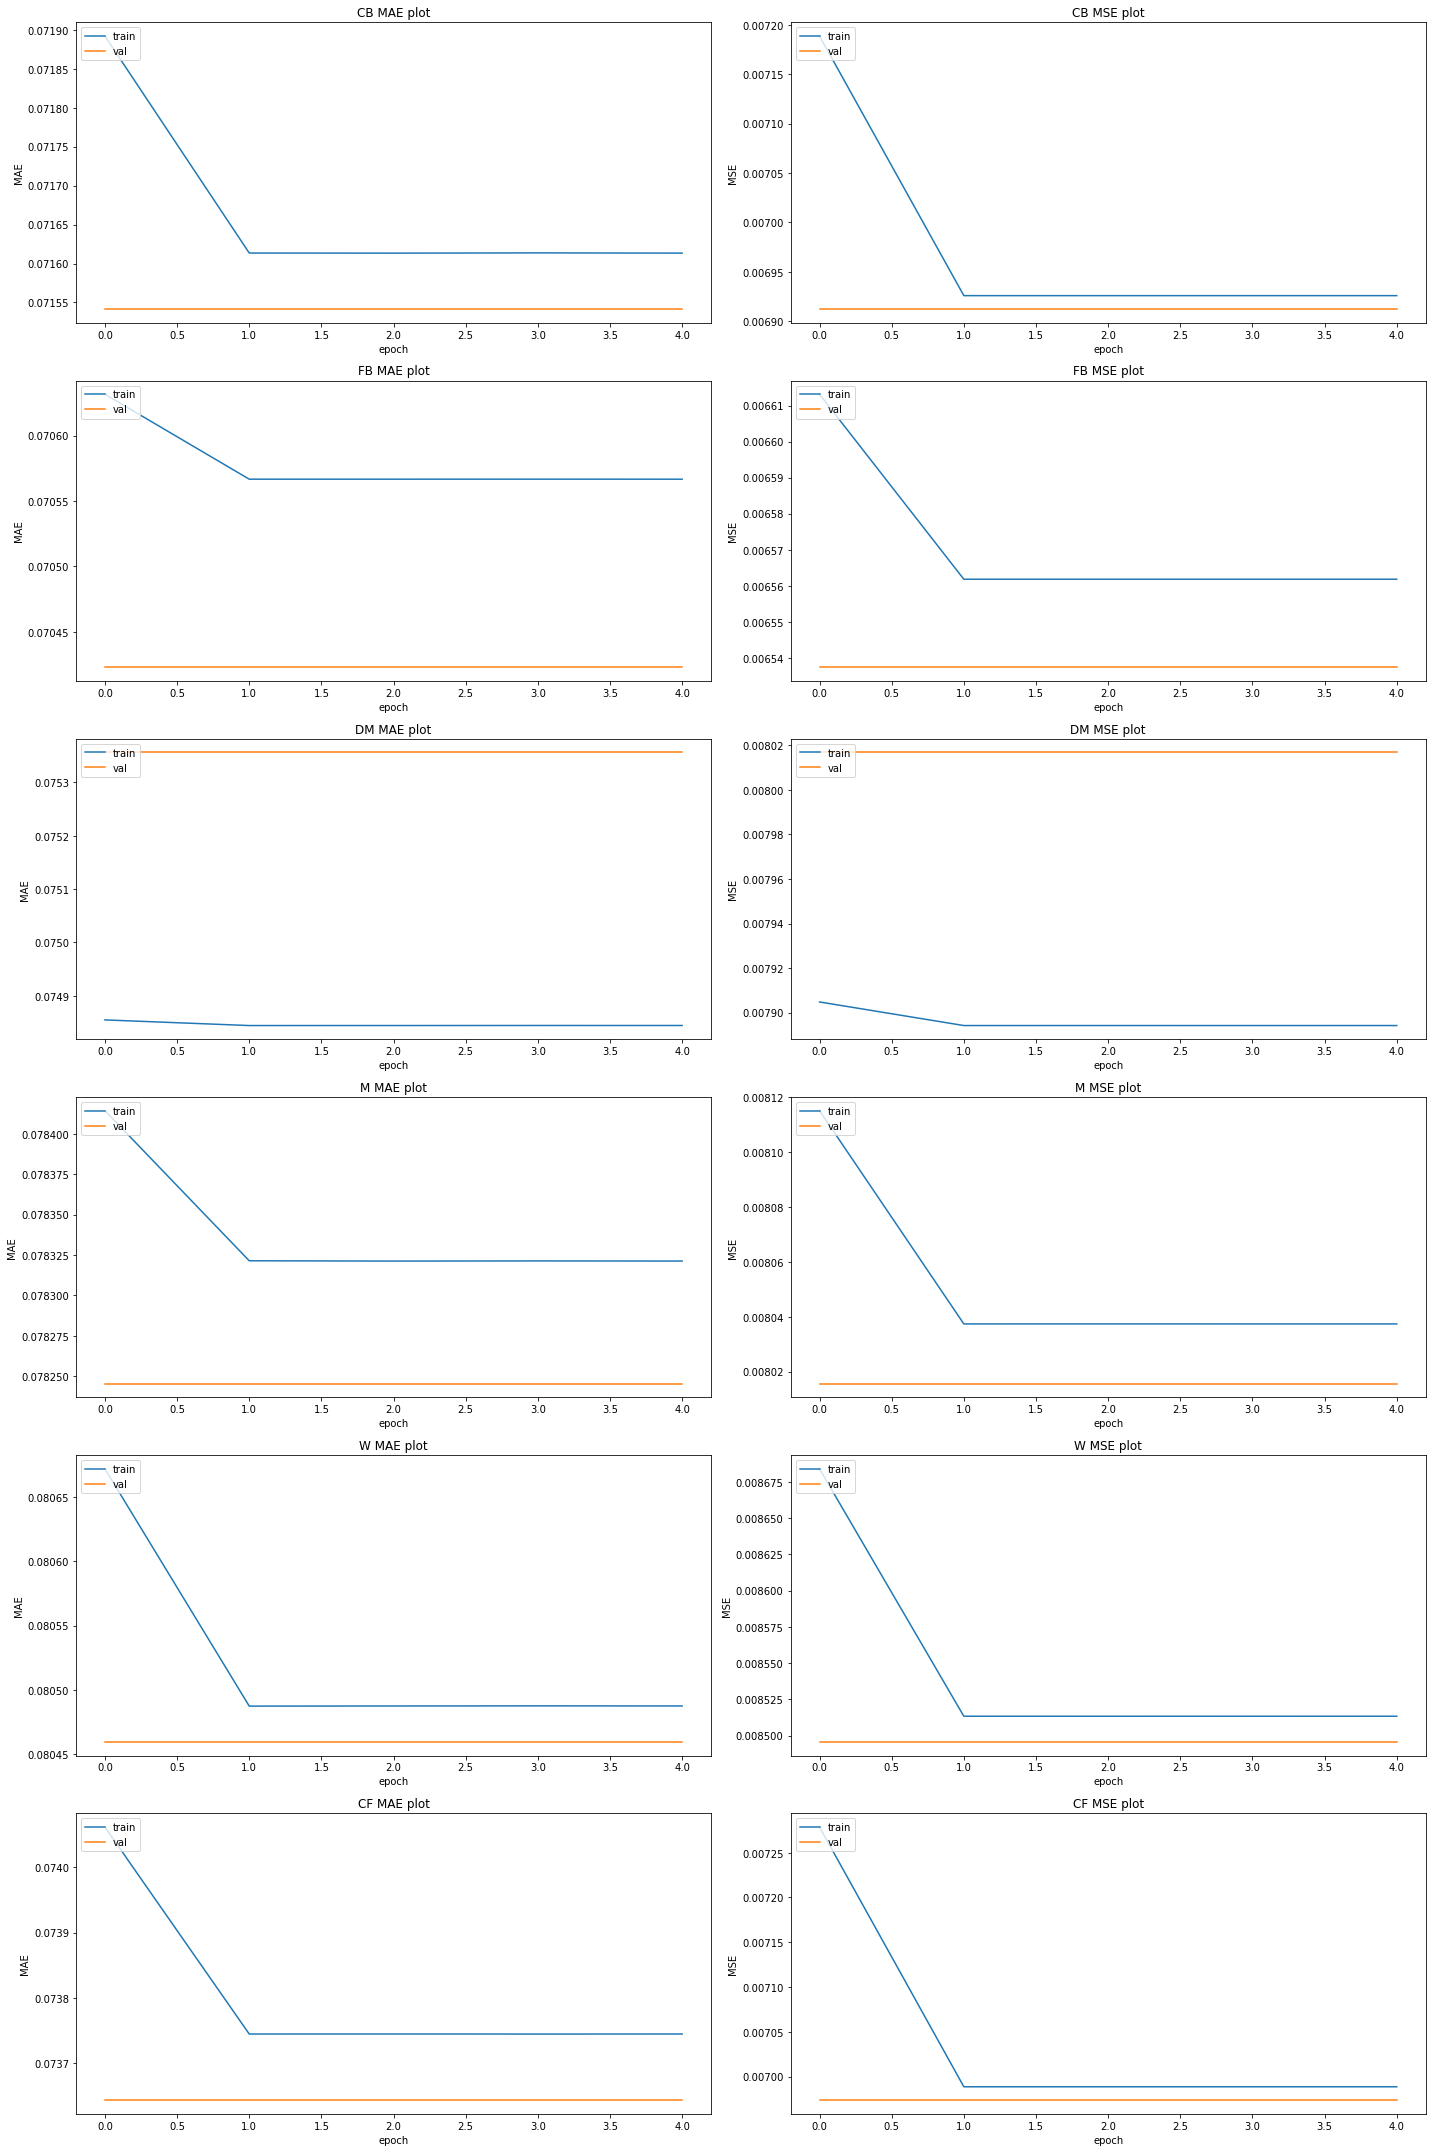

In [11]:
### Framework 2 Neural Network 2

# create models
cb_skip_connections_2 = create_skip_connections(1, cb_raw_traits.shape[1]*2)
fb_skip_connections_2 = create_skip_connections(1, fb_raw_traits.shape[1]*2)
dm_skip_connections_2 = create_skip_connections(1, dm_raw_traits.shape[1]*2)
m_skip_connections_2 = create_skip_connections(1, m_raw_traits.shape[1]*2)
w_skip_connections_2 = create_skip_connections(1, w_raw_traits.shape[1]*2)
cf_skip_connections_2 = create_skip_connections(1, cf_raw_traits.shape[1]*2)

# compile models
cb_skip_connections_2 = compile_model(cb_skip_connections_2, loss='mae', optimizer='adam', metrics='mse')
fb_skip_connections_2 = compile_model(fb_skip_connections_2, loss='mae', optimizer='adam', metrics='mse')
dm_skip_connections_2 = compile_model(dm_skip_connections_2, loss='mae', optimizer='adam', metrics='mse')
m_skip_connections_2 = compile_model(m_skip_connections_2, loss='mae', optimizer='adam', metrics='mse')
w_skip_connections_2 = compile_model(w_skip_connections_2, loss='mae', optimizer='adam', metrics='mse')
cf_skip_connections_2 = compile_model(cf_skip_connections_2, loss='mae', optimizer='adam', metrics='mse')

# train models
cb_skip_connections_2_history = train_model(cb_skip_connections_2,
                                            cb_X_train_2, 
                                            cb_Y_train_2, 
                                            cb_X_dev_2, 
                                            cb_Y_dev_2, 
                                            epochs=5, 
                                            batch_size=256)
fb_skip_connections_2_history = train_model(fb_skip_connections_2,
                                            fb_X_train_2, 
                                            fb_Y_train_2, 
                                            fb_X_dev_2, 
                                            fb_Y_dev_2, 
                                            epochs=5, 
                                            batch_size=256)
dm_skip_connections_2_history = train_model(dm_skip_connections_2,
                                            dm_X_train_2, 
                                            dm_Y_train_2, 
                                            dm_X_dev_2, 
                                            dm_Y_dev_2,
                                            epochs=5, 
                                            batch_size=256)
m_skip_connections_2_history = train_model(m_skip_connections_2,
                                           m_X_train_2, 
                                           m_Y_train_2, 
                                           m_X_dev_2, 
                                           m_Y_dev_2, 
                                           epochs=5, 
                                           batch_size=256)
w_skip_connections_2_history = train_model(w_skip_connections_2,
                                           w_X_train_2, 
                                           w_Y_train_2, 
                                           w_X_dev_2, 
                                           w_Y_dev_2,
                                           epochs=5,
                                           batch_size=256)
cf_skip_connections_2_history = train_model(cf_skip_connections_2,
                                            cf_X_train_2,
                                            cf_Y_train_2, 
                                            cf_X_dev_2, 
                                            cf_Y_dev_2, 
                                            epochs=5, 
                                            batch_size=256)

# display results
skip_connections_2_history_dict = {'CB': cb_skip_connections_2_history,
                                   'FB': fb_skip_connections_2_history,
                                   'DM': dm_skip_connections_2_history,
                                   'M': m_skip_connections_2_history,
                                   'W': w_skip_connections_2_history,
                                   'CF': cf_skip_connections_2_history
                                  }

display_learning_curves(skip_connections_2_history_dict)

### Prediction

In [136]:
### Framework 1 Neural Network 1
fully_connected_1_scores_cb = cb_fully_connected_1.predict(cb_features_1)
fully_connected_1_scores_fb = fb_fully_connected_1.predict(fb_features_1)
fully_connected_1_scores_dm = dm_fully_connected_1.predict(dm_features_1)
fully_connected_1_scores_m = m_fully_connected_1.predict(m_features_1)
fully_connected_1_scores_w = w_fully_connected_1.predict(w_features_1)
fully_connected_1_scores_cf = cf_fully_connected_1.predict(cf_features_1)

ssl_1_1_dict = {'CB': fully_connected_1_scores_cb,
                'FB': fully_connected_1_scores_fb,
                'DM': fully_connected_1_scores_dm,
                'M': fully_connected_1_scores_m,
                'W': fully_connected_1_scores_w,
                'CF': fully_connected_1_scores_cf
               }

In [137]:
### Framework 1 Neural Network 2
skip_connections_1_scores_cb = cb_skip_connections_1.predict(cb_features_1)
skip_connections_1_scores_fb = fb_skip_connections_1.predict(fb_features_1)
skip_connections_1_scores_dm = dm_skip_connections_1.predict(dm_features_1)
skip_connections_1_scores_m = m_skip_connections_1.predict(m_features_1)
skip_connections_1_scores_w = w_skip_connections_1.predict(w_features_1)
skip_connections_1_scores_cf = cf_skip_connections_1.predict(cf_features_1)

ssl_1_2_dict = {'CB': skip_connections_1_scores_cb,
                'FB': skip_connections_1_scores_fb,
                'DM': skip_connections_1_scores_dm,
                'M': skip_connections_1_scores_m,
                'W': skip_connections_1_scores_w,
                'CF': skip_connections_1_scores_cf
               }

In [138]:
### Framework 2 Neural Network 1
fully_connected_2_scores_cb = cb_fully_connected_2.predict(cb_features_2)
fully_connected_2_scores_fb = fb_fully_connected_2.predict(fb_features_2)
fully_connected_2_scores_dm = dm_fully_connected_2.predict(dm_features_2)
fully_connected_2_scores_m = m_fully_connected_2.predict(m_features_2)
fully_connected_2_scores_w = w_fully_connected_2.predict(w_features_2)
fully_connected_2_scores_cf = cf_fully_connected_2.predict(cf_features_2)

ssl_2_1_dict = {'CB': fully_connected_2_scores_cb,
                'FB': fully_connected_2_scores_fb,
                'DM': fully_connected_2_scores_dm,
                'M': fully_connected_2_scores_m,
                'W': fully_connected_2_scores_w,
                'CF': fully_connected_2_scores_cf
               }

In [12]:
### Framework 2 Neural Network 2
skip_connections_2_scores_cb = cb_skip_connections_2.predict(cb_features_2)
skip_connections_2_scores_fb = fb_skip_connections_2.predict(fb_features_2)
skip_connections_2_scores_dm = dm_skip_connections_2.predict(dm_features_2)
skip_connections_2_scores_m = m_skip_connections_2.predict(m_features_2)
skip_connections_2_scores_w = w_skip_connections_2.predict(w_features_2)
skip_connections_2_scores_cf = cf_skip_connections_2.predict(cf_features_2)

ssl_2_2_dict = {'CB': skip_connections_2_scores_cb,
                'FB': skip_connections_2_scores_fb,
                'DM': skip_connections_2_scores_dm,
                'M': skip_connections_2_scores_m,
                'W': skip_connections_2_scores_w,
                'CF': skip_connections_2_scores_cf
               }

In [128]:
# reshape scores to square array
fully_connected_2_scores_cb = fully_connected_2_scores_cb.reshape((cb_features_1.shape[0], cb_features_1.shape[0]))
fully_connected_2_scores_fb = fully_connected_2_scores_fb.reshape((fb_features_1.shape[0], fb_features_1.shape[0]))
fully_connected_2_scores_dm = fully_connected_2_scores_dm.reshape((dm_features_1.shape[0], dm_features_1.shape[0]))
fully_connected_2_scores_m = fully_connected_2_scores_m.reshape((m_features_1.shape[0], m_features_1.shape[0]))
fully_connected_2_scores_w = fully_connected_2_scores_w.reshape((w_features_1.shape[0], w_features_1.shape[0]))
fully_connected_2_scores_cf = fully_connected_2_scores_cf.reshape((cf_features_1.shape[0], cf_features_1.shape[0]))

skip_connections_2_scores_cb = skip_connections_2_scores_cb.reshape((cb_features_1.shape[0], cb_features_1.shape[0]))
skip_connections_2_scores_fb = skip_connections_2_scores_fb.reshape((fb_features_1.shape[0], fb_features_1.shape[0]))
skip_connections_2_scores_dm = skip_connections_2_scores_dm.reshape((dm_features_1.shape[0], dm_features_1.shape[0]))
skip_connections_2_scores_m = skip_connections_2_scores_m.reshape((m_features_1.shape[0], m_features_1.shape[0]))
skip_connections_2_scores_w = skip_connections_2_scores_w.reshape((w_features_1.shape[0], w_features_1.shape[0]))
skip_connections_2_scores_cf = skip_connections_2_scores_cf.reshape((cf_features_1.shape[0], cf_features_1.shape[0]))

### Evaluation

In [129]:
def eval_1(scores, raw_traits):
    
    # get list of predicted ranks of queried players
    queried_player_ranks = []
    for queried_player_index, scores in enumerate(scores):
        player_indices = np.argpartition(scores, -len(raw_traits))
        player_indices = np.flip(player_indices[np.argsort(scores[player_indices])])
        
        for rank, index in enumerate(player_indices):
            if index == queried_player_index:
                queried_player_ranks.append(rank+1)
    
    return np.average(queried_player_ranks)

In [130]:
def eval_2(scores, raw_traits, top_n=20):

    # get list of all averaged ratio stds for each queried player
    avg_ratio_stds = []
    for queried_player_index, scores in enumerate(scores):

        queried_traits = raw_traits[queried_player_index]
        queried_traits[np.where(queried_traits==0)] = 0.001 # small epsilon to avoid division by zero
        
        top_n_indices = np.argpartition(scores, -top_n-1)[-top_n-1:]
        top_n_indices = np.flip(top_n_indices[np.argsort(scores[top_n_indices])])
        
        # get list of ratio std's between queried player and ranked player
        ratio_stds = []
        for ind in top_n_indices:
            # stop loop when top_n players have been processed
            if len(ratio_stds) == top_n:
                break
            # skip queried player
            if ind == queried_player_index:
                continue
                
            player_traits = raw_traits[ind]
            ratios = player_traits / queried_traits
            ratio_std = ratios.std()
            ratio_stds.append(ratio_std)

        # compute average of ratio stds
        avg_ratio_stds.append(np.average(ratio_stds))

    return np.average(avg_ratio_stds)

In [131]:
def eval_3(scores):
    # compute variances of all queries
    all_variances = np.var(scores, axis=1)
    
    return np.average(all_variances)

In [132]:
def eval_4(scores):
    # compute skewness of all queries
    all_skews = skew(scores, axis=1)
    
    return np.average(all_skews)

In [133]:
def eval_5(scores):
    # compute kurtosis of all queries
    all_kurtosis = kurtosis(scores, axis=1)
    
    return np.average(all_kurtosis)

In [134]:
def eval_6(scores):
    # get min and max of all scores
    min_score = scores.min()
    max_score = scores.max()
    
    return [min_score, max_score]

In [140]:
methods_dict = {'Self Supervised Learning 1.1': ssl_1_1_dict,
                'Self Supervised Learning 1.2': ssl_1_2_dict,
                'Self Supervised Learning 2.1': ssl_2_1_dict,
                'Self Supervised Learning 2.2': ssl_2_2_dict
               }
dynamicity_dict = {'Self Supervised Learning 1.1': 'N',
                   'Self Supervised Learning 1.2': 'N',
                   'Self Supervised Learning 2.1': 'N',
                   'Self Supervised Learning 2.2': 'N'
                  }

In [143]:
results = {'Method': [],
           'Average rank of queried player': [],
           'Standard deviation of trait ratios of top 20 similar players': [],
           'Scores sparsity': [],
           'Skewness of scores': [],
           'Kurtosis of scores': [],
           'Range of scores': [],
           'Dynamicity': []
          }

for name, dictionary in methods_dict.items():
    results['Method'].append(name)
    results['Dynamicity'].append(dynamicity_dict[name])
    eval_1_list = []
    eval_2_list = []
    eval_3_list = []
    eval_4_list = []
    eval_5_list = []
    min_score = 99999
    max_score = -99999
    for pos, scores in dictionary.items():
        raw_traits = raw_traits_dict[pos]
        eval_1_list.append(eval_1(scores, raw_traits))
        eval_2_list.append(eval_2(scores, raw_traits))
        eval_3_list.append(eval_3(scores))
        eval_4_list.append(eval_4(scores))
        eval_5_list.append(eval_5(scores))
        temp_min_score, temp_max_score = eval_6(scores)
        min_score = min(min_score, temp_min_score)
        max_score = max(max_score, temp_max_score)
    results['Average rank of queried player'].append(np.average(eval_1_list))
    results['Standard deviation of trait ratios of top 20 similar players'].append(np.average(eval_2_list))
    results['Scores sparsity'].append(np.average(eval_3_list))
    results['Skewness of scores'].append(np.average(eval_4_list))
    results['Kurtosis of scores'].append(np.average(eval_5_list))
    results['Range of scores'].append([round(min_score, 2), round(max_score, 2)])

In [145]:
results_df = pd.DataFrame(results)

In [146]:
results_df

,Method,Average rank of queried player,Standard deviation of trait ratios of top 20 similar players,Scores sparsity,Skewness of scores,Kurtosis of scores,Range of scores,Dynamicity
0,Self Supervised Learning 1.1,47.388345,0.446232,0.001204,-1.674688,7.844881,"[0.42, 0.99]",N
1,Self Supervised Learning 1.2,173.957378,0.529069,0.000797,-2.061495,11.674683,"[0.54, 0.99]",N
2,Self Supervised Learning 2.1,1.041070,0.373312,0.000830,-1.198358,6.325966,"[0.43, 1.0]",N
3,Self Supervised Learning 2.2,541.000000,0.786224,0.000000,0.000000,-3.000000,"[1.0, 1.0]",N
